In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import sys
import tarfile
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves import cPickle as pickle
#import pickle
import h5py
import skimage
from skimage.io import imread, imsave
from skimage.transform import resize, rotate

%matplotlib inline 

/home/josh/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# preprocessing train and test data

In [3]:
train_files = 'train.tar.gz'
test_files = 'test.tar.gz'

train_root = os.path.splitext(os.path.splitext(train_files)[0])[0]  # remove .tar.gz
test_root = os.path.splitext(os.path.splitext(test_files)[0])[0]

In [4]:
extra_files = 'extra.tar.gz'
extra_root = os.path.splitext(os.path.splitext(extra_files)[0])[0]

decompress training data to folder 'train' and testing data to folder 'test'

In [3]:
tar = tarfile.open(train_files)
sys.stdout.flush()
tar.extractall()
tar.close()

tar = tarfile.open(test_files)
sys.stdout.flush()
tar.extractall()
tar.close()

In [3]:
tar = tarfile.open(extra_files)
sys.stdout.flush()
tar.extractall()
tar.close()

In [4]:
train_list =[train_root + '/' + x for x in os.listdir(train_root) ]
test_list =[test_root + '/' + x for x in os.listdir(test_root) ]

In [5]:
extra_list =[extra_root + '/' + x for x in os.listdir(extra_root) ]

info_file is 'digit_struct.mat'

In [5]:
train_info = [s for s in train_list if '.mat' in s]
test_info = [s for s in test_list if '.mat' in s]

train_f = h5py.File(train_info[0],'r')
test_f = h5py.File(test_info[0],'r')

for name in train_f:
    print name

#refs#
digitStruct


In [7]:
extra_info = [s for s in extra_list if '.mat' in s]

extra_f = h5py.File(extra_info[0],'r')


for name in extra_f:
    print name
    
extra_f['/digitStruct/bbox'][0]

#refs#
digitStruct


array([<HDF5 object reference>], dtype=object)

# extract information from matadata

In [10]:
class metadataExtractor(object):
    
    def __init__(self, f):
        self._metadata= {}
        self._metadata['height'] = []
        self._metadata['label'] = []
        self._metadata['left'] = []
        self._metadata['top'] = []
        self._metadata['width'] = []
        self._f = f
        
    def _print_attrs(self, name, obj):
        vals = []
        if obj.shape[0] == 1:
            vals.append(obj[0][0])
        else:
            for k in range(obj.shape[0]):
                vals.append(self._f[obj[k][0]][0][0])
        self._metadata[name].append(vals)
        
    def extract(self):
        i = 0
        for item in self._f['/digitStruct/bbox']:
            self._f[item[0]].visititems(self._print_attrs)
            i +=1
            if i%200 is 0:
                print 'extract {}th iterm'.format(i)
            
            
        return self._metadata
    
    

In [7]:
train_metadata = metadataExtractor(train_f).extract()
print 'Train metadata extracted'
test_metadata = metadataExtractor(test_f).extract()
print 'Test metadata extracted'

Train metadata extracted
Test metadata extracted


In [11]:
extra_metadata = metadataExtractor(extra_f).extract()
print 'Extra metadata extracted'

extract 200th iterm
extract 400th iterm
extract 600th iterm
extract 800th iterm
extract 1000th iterm
extract 1200th iterm
extract 1400th iterm
extract 1600th iterm
extract 1800th iterm
extract 2000th iterm
extract 2200th iterm
extract 2400th iterm
extract 2600th iterm
extract 2800th iterm
extract 3000th iterm
extract 3200th iterm
extract 3400th iterm
extract 3600th iterm
extract 3800th iterm
extract 4000th iterm
extract 4200th iterm
extract 4400th iterm
extract 4600th iterm
extract 4800th iterm
extract 5000th iterm
extract 5200th iterm
extract 5400th iterm
extract 5600th iterm
extract 5800th iterm
extract 6000th iterm
extract 6200th iterm
extract 6400th iterm
extract 6600th iterm
extract 6800th iterm
extract 7000th iterm
extract 7200th iterm
extract 7400th iterm
extract 7600th iterm
extract 7800th iterm
extract 8000th iterm
extract 8200th iterm
extract 8400th iterm
extract 8600th iterm
extract 8800th iterm
extract 9000th iterm
extract 9200th iterm
extract 9400th iterm
extract 9600th it

In [8]:
train_metadata.keys()

['width', 'top', 'label', 'left', 'height']

# pickle the extracted metadata

In [9]:
pickle_file = 'train_metadata.pickle'
try:
    pickleData = open(pickle_file, 'wb')
    pickle.dump(train_metadata, pickleData, pickle.HIGHEST_PROTOCOL)
    pickleData.close()
    print 'Train metadata pickled'
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise


    
pickle_file = 'test_metadata.pickle'
try:
    pickleData = open(pickle_file, 'wb')
    pickle.dump(test_metadata, pickleData, pickle.HIGHEST_PROTOCOL)
    pickleData.close()
    print 'Test metadata pickled'
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise

Train metadata pickled
Test metadata pickled


In [12]:
pickle_file = 'extra_metadata.pickle'
try:
    pickleData = open(pickle_file, 'wb')
    pickle.dump(extra_metadata, pickleData, pickle.HIGHEST_PROTOCOL)
    pickleData.close()
    print 'Extra metadata pickled'
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise

Extra metadata pickled


In [10]:
img = imread('train/1.png')

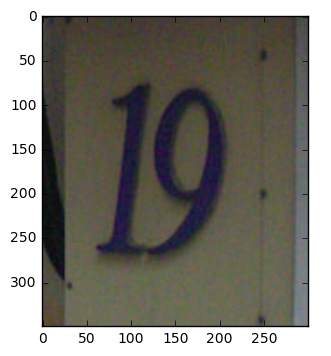

In [11]:
plt.imshow(img[:,200:500,:])
plt.show()

In [12]:
np.min((img-128.0)/128.0)

-1.0

# read metadata from pickle file

In [2]:
pickle_file = 'train_metadata.pickle'
train_metadata = {}

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_metadata = save
    del save  # hint to help gc free up memory

    
pickle_file = 'test_metadata.pickle'
test_metadata = {}

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    test_metadata = save
    del save  # hint to help gc free up memory

In [2]:
pickle_file = 'extra_metadata.pickle'
extra_metadata = {}

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    extra_metadata = save
    del save  # hint to help gc free up memory

In [3]:
train_metadata['label'][:2]

[[1.0, 9.0], [2.0, 3.0]]

# Resize image and change corresponding metadata

In [4]:

def resize_and_boxes(img, new_size=[32,32], top=[5,5], left=[5,5], height=[30,30],width=[30,30]):
    img_resize = skimage.transform.resize(img, new_size)
    
    #the following line does not work. training accuracy won't improve. strange.
    #img_resize = ( img_resize - 128.0 ) /128.0
    
    v_factor = 1.0*new_size[0]/img.shape[0]
    new_top = v_factor * np.asarray(top) 
    new_height = v_factor*np.asarray(height)
    
    new_bottom = new_top + new_height
    new_top = np.floor(new_top)
    new_height = np.ceil(new_bottom - new_top)
    
    h_factor = 1.0 * new_size[1]/img.shape[1]
    new_left = h_factor * np.asarray(left) 
    new_width = h_factor * np.asarray(width)
    
    new_right = new_left + new_width
    new_left = np.floor(new_left)
    new_width = np.ceil(new_right - new_left)
    
    new_box = {'top': new_top.tolist(), 'left': new_left.tolist(),
               'height':new_height.tolist(), 'width':new_width.tolist()}

    return img_resize, new_box

In [5]:
def crop_and_resize(img, new_size=[32,32], top=[5,5], left=[5,5], height=[30,30],width=[30,30], margin =0.1 ):
    
    new_top =  np.min( np.asarray(top) ) 
    new_bottom =  np.max( np.asarray(top) + np.asarray(height)) 
    
    v_margin = margin *(new_bottom - new_top)
    
    new_top = int(new_top - v_margin)
    new_bottom = int(new_bottom + v_margin)
    
    new_left =  np.min( np.asarray(left) ) 
    new_right =  np.max( np.asarray(left) + np.asarray(width)) 
    
    h_margin = margin*(new_right - new_left)
    
    new_left = int(new_left - h_margin)
    new_right = int(new_right + h_margin)
    
    #print new_top, new_bottom, new_left, new_right
    
    cropped = img[ max(new_top,0):min(new_bottom,img.shape[0]), max(new_left,0):min(new_right,img.shape[1]), :]
    
    img_resize = skimage.transform.resize(cropped, new_size)
    
    #the following line does not work. training accuracy won't improve. strange.
    #img_resize = ( img_resize - 128.0 ) /128.0
    
    
    
    new_box = {'top': [0], 'left': [0],
               'height':[(new_size[0]-1)], 'width': [(new_size[0]-1)] }

    return img_resize, new_box

In [8]:
img = imread('train/1.png')
img_resize, _ = crop_and_resize(img, new_size=[64,64], top=train_metadata['top'][0], 
                                               left = train_metadata['left'][0], height=train_metadata['height'][0], 
                                               width = train_metadata['width'][0])

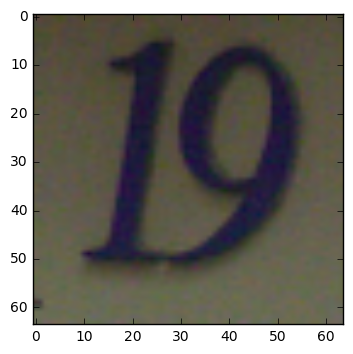

In [9]:
plt.imshow(img_resize)
plt.show()

# Generate resized training and testing data set

In [3]:
#Note: file_list must have one to one correspondence relation with metadata
def get_data_and_resize(file_list, metadata, image_size = [64,64]):
    
    dataset = np.ndarray(shape=(len(file_list), image_size[0], image_size[1], 3), dtype=np.float32)
    outcome = {}
    outcome['left']=[]
    outcome['top']=[]
    outcome['height']=[]
    outcome['width']=[]
    outcome['label']=[]

    for i in range(len(file_list)):
        img = imread(file_list[i])
        img_resize, new_box = resize_and_boxes(img, new_size=image_size, top=metadata['top'][i], 
                                               left = metadata['left'][i], height=metadata['height'][i], 
                                               width = metadata['width'][i])
        dataset[i,:,:,:] = img_resize
    
        outcome['label'].append(metadata['label'][i])
    
        for name in new_box.keys():
            outcome[name].append(new_box[name])
            
    return dataset, outcome


def crop_data_and_resize(file_list, metadata, image_size = [64,64]):
    
    dataset = np.ndarray(shape=(len(file_list), image_size[0], image_size[1], 3), dtype=np.float32)
    outcome = {}
    outcome['left']=[]
    outcome['top']=[]
    outcome['height']=[]
    outcome['width']=[]
    outcome['label']=[]

    for i in range(len(file_list)):
        img = imread(file_list[i])
        img_resize, new_box = crop_and_resize(img, new_size=image_size, top=metadata['top'][i], 
                                               left = metadata['left'][i], height=metadata['height'][i], 
                                               width = metadata['width'][i])
        dataset[i,:,:,:] = img_resize
    
        outcome['label'].append(metadata['label'][i])
    
        for name in new_box.keys():
            outcome[name].append(new_box[name])
            
    return dataset, outcome

In [11]:
#train
#train_size = len(train_list)-2
train_size = len(train_metadata['label'])
image_size = [64,64]

file_list = ['train/' + str(x+1) + '.png' for x in range(train_size)]

train_dataset, train_outcome = get_data_and_resize(file_list, train_metadata, image_size)

train_dataset2, train_outcome2 = crop_data_and_resize(file_list, train_metadata, image_size)

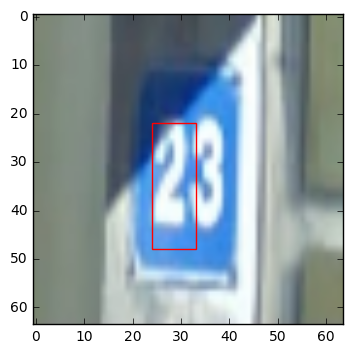

In [12]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(train_dataset[1,:,:,:])

# Create a Rectangle patch
rect = patches.Rectangle((train_outcome['left'][1][0],train_outcome['top'][1][0]),
                         train_outcome['width'][1][0],train_outcome['height'][1][0],
                         linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

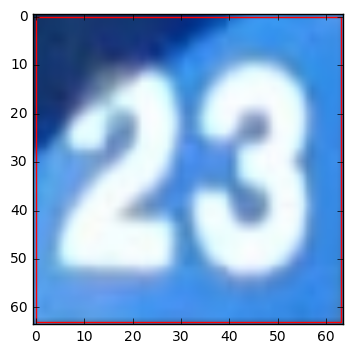

In [13]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(train_dataset2[1,:,:,:])

# Create a Rectangle patch
rect = patches.Rectangle((train_outcome2['left'][1][0],train_outcome2['top'][1][0]),
                         train_outcome2['width'][1][0],train_outcome2['height'][1][0],
                         linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [23]:
train_dataset.shape

(33402, 64, 64, 3)

In [24]:
train_outcome['width'][33]

[10.0, 14.0]

In [14]:
#test
test_size = len(test_metadata['label'])
image_size = [64,64]

file_list = ['test/' + str(x+1) + '.png' for x in range(test_size)]

test_dataset, test_outcome = get_data_and_resize(file_list, test_metadata, image_size)
test_dataset2, test_outcome2 = crop_data_and_resize(file_list, test_metadata, image_size)

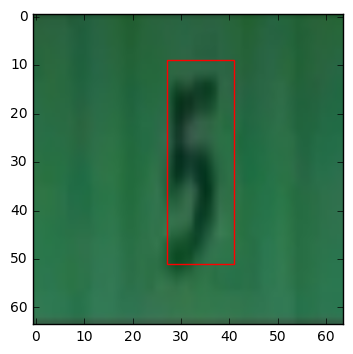

In [15]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(test_dataset[0,:,:,:])

# Create a Rectangle patch
rect = patches.Rectangle((test_outcome['left'][0][0],test_outcome['top'][0][0]),
                         test_outcome['width'][0][0],test_outcome['height'][0][0],
                         linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

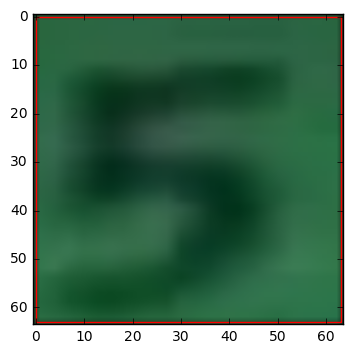

In [16]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(test_dataset2[0,:,:,:])

# Create a Rectangle patch
rect = patches.Rectangle((test_outcome2['left'][0][0],test_outcome2['top'][0][0]),
                         test_outcome2['width'][0][0],test_outcome2['height'][0][0],
                         linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [18]:
#extra
#extra_size = len(extra_metadata['label'])
extra_size = 500
image_size = [64,64]

file_list = ['extra/' + str(x+1) + '.png' for x in range(extra_size)]

extra_dataset, extra_outcome = get_data_and_resize(file_list, extra_metadata, image_size)
extra_dataset2, extra_outcome2 = crop_data_and_resize(file_list, extra_metadata, image_size)

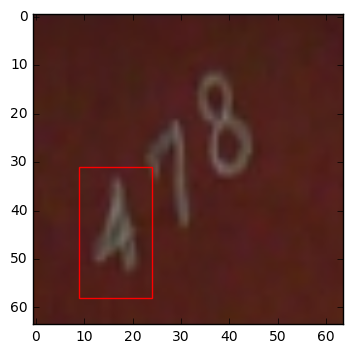

In [19]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(extra_dataset[0,:,:,:])

# Create a Rectangle patch
rect = patches.Rectangle((extra_outcome['left'][0][0],extra_outcome['top'][0][0]),
                         extra_outcome['width'][0][0],extra_outcome['height'][0][0],
                         linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

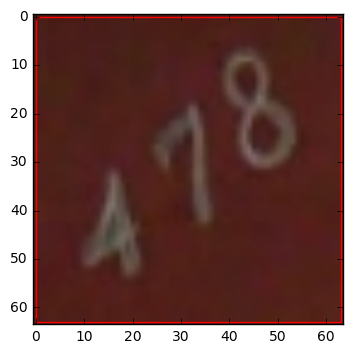

In [20]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(extra_dataset2[0,:,:,:])

# Create a Rectangle patch
rect = patches.Rectangle((extra_outcome2['left'][0][0],extra_outcome2['top'][0][0]),
                         extra_outcome2['width'][0][0],extra_outcome2['height'][0][0],
                         linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

## pickle the data sets for later use

In [17]:
pickle_file = 'train.pickle'
train = {'data':train_dataset, 'outcome':train_outcome}
try:
    pickleData = open(pickle_file, 'wb')
    pickle.dump(train, pickleData, pickle.HIGHEST_PROTOCOL)
    pickleData.close()
    print 'Train dataset pickled'
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise


Train dataset pickled


In [18]:
pickle_file = 'train2.pickle'
train = {'data':train_dataset2, 'outcome':train_outcome2}
try:
    pickleData = open(pickle_file, 'wb')
    pickle.dump(train, pickleData, pickle.HIGHEST_PROTOCOL)
    pickleData.close()
    print 'Train dataset pickled'
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise

Train dataset pickled


In [19]:
pickle_file = 'test.pickle'
test = {'data':test_dataset, 'outcome':test_outcome}
try:
    pickleData = open(pickle_file, 'wb')
    pickle.dump(test, pickleData, pickle.HIGHEST_PROTOCOL)
    pickleData.close()
    print 'Test dataset pickled'
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise

Test dataset pickled


In [20]:
pickle_file = 'test2.pickle'
test = {'data':test_dataset2, 'outcome':test_outcome2}
try:
    pickleData = open(pickle_file, 'wb')
    pickle.dump(test, pickleData, pickle.HIGHEST_PROTOCOL)
    pickleData.close()
    print 'Test dataset pickled'
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise

Test dataset pickled


In [21]:
pickle_file = 'train.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_X = save['data']
    train_outcome = save['outcome']
    del save  # hint to help gc free up memory

In [22]:
train_X.shape

(33402, 64, 64, 3)

In [23]:
print train_outcome['label'][:10]

[[1.0, 9.0], [2.0, 3.0], [2.0, 5.0], [9.0, 3.0], [3.0, 1.0], [3.0, 3.0], [2.0, 8.0], [7.0, 4.0, 4.0], [1.0, 2.0, 8.0], [1.0, 6.0]]


## Extra data is too large, so split them to 8 files

In [35]:
#Note: file_list must have one to one correspondence relation with metadata
def get_data_and_resize_range(root, start, end, metadata, image_size = [64,64]):
    
    file_list = [root + '/' + str(x+1) + '.png' for x in range(start, end)]
    
    dataset = np.ndarray(shape=(len(file_list), image_size[0], image_size[1], 3), dtype=np.float32)
    outcome = {}
    outcome['left']=[]
    outcome['top']=[]
    outcome['height']=[]
    outcome['width']=[]
    outcome['label']=[]

    for i in range(start, end):
        img = imread(file_list[i-start])
        img_resize, new_box = resize_and_boxes(img, new_size=image_size, top=metadata['top'][i], 
                                               left = metadata['left'][i], height=metadata['height'][i], 
                                               width = metadata['width'][i])
        dataset[i-start,:,:,:] = img_resize
    
        outcome['label'].append(metadata['label'][i])
    
        for name in new_box.keys():
            outcome[name].append(new_box[name])
            
    return dataset, outcome


def crop_data_and_resize_range(root, start, end, metadata, image_size = [64,64]):
    
    file_list = [root + '/' + str(x+1) + '.png' for x in range(start, end)]
    
    dataset = np.ndarray(shape=(len(file_list), image_size[0], image_size[1], 3), dtype=np.float32)
    outcome = {}
    outcome['left']=[]
    outcome['top']=[]
    outcome['height']=[]
    outcome['width']=[]
    outcome['label']=[]

    for i in range(start, end):
        img = imread(file_list[i-start])
        img_resize, new_box = crop_and_resize(img, new_size=image_size, top=metadata['top'][i], 
                                               left = metadata['left'][i], height=metadata['height'][i], 
                                               width = metadata['width'][i])
        dataset[i-start,:,:,:] = img_resize
    
        outcome['label'].append(metadata['label'][i])
    
        for name in new_box.keys():
            outcome[name].append(new_box[name])
            
    return dataset, outcome

In [36]:
split_idx = ( np.arange(8)*int(len(extra_metadata['label'])/8) ).tolist()
split_idx.append(len(extra_metadata['label']))
extra_root = 'extra'
image_size = [64,64]

for i in range(len(split_idx)-1):
    extra_dataset, extra_outcome = get_data_and_resize_range(extra_root, 
                                                             split_idx[i], split_idx[i+1],
                                                             extra_metadata, image_size)
    
    pickle_file = extra_root + '_full_' + str(i) + '.pickle'
    extra = {'data':extra_dataset, 'outcome':extra_outcome}
    try:
        pickleData = open(pickle_file, 'wb')
        pickle.dump(extra, pickleData, pickle.HIGHEST_PROTOCOL)
        pickleData.close()
        print 'Extra dataset pickled: full {}'.format(i)
    except Exception as e:
        print 'Unable to save data to', pickle_file, ':', e
        raise
    
    extra_dataset2, extra_outcome2 = crop_data_and_resize_range(extra_root, 
                                                                split_idx[i], split_idx[i+1], 
                                                                extra_metadata, image_size)
    
    pickle_file = extra_root + '_crop_' + str(i) + '.pickle'
    extra = {'data':extra_dataset2, 'outcome':extra_outcome2}
    try:
        pickleData = open(pickle_file, 'wb')
        pickle.dump(extra, pickleData, pickle.HIGHEST_PROTOCOL)
        pickleData.close()
        print 'Extra dataset pickled: crop {}'.format(i)
    except Exception as e:
        print 'Unable to save data to', pickle_file, ':', e
        raise
    
    
    

Extra dataset pickled: full 0
Extra dataset pickled: crop 0
Extra dataset pickled: full 1
Extra dataset pickled: crop 1
Extra dataset pickled: full 2
Extra dataset pickled: crop 2
Extra dataset pickled: full 3
Extra dataset pickled: crop 3
Extra dataset pickled: full 4
Extra dataset pickled: crop 4
Extra dataset pickled: full 5
Extra dataset pickled: crop 5
Extra dataset pickled: full 6
Extra dataset pickled: crop 6
Extra dataset pickled: full 7
Extra dataset pickled: crop 7


In [23]:
len(extra_metadata['label'])/8

25294

In [28]:
split_idx

[0, 25294, 50588, 75882, 101176, 126470, 151764, 177058, 202353]